# ***Etapa 1***
Crie uma base de dados chamada "Loja" com o MySQL Server por meio do software MySQL Workbench. Adicione 
as estruturas de dados neste banco, utilizando os comandos de definição de dados (DDL) da linguagem SQL, e 
respeitando o modelo definido no DER da Figura a seguir.

Na criação do banco de dados da figura, respeite as seguintes regras:
* As chaves primárias devem ser colocadas todas como autoincremento.
* Respeite os relacionamentos, tipos, precisões e restrições de não nulo.
* O campo “Situação” da tabela “ContaReceber” deve ser do tipo ENUM e possuir apenas os valores 1, 2 ou 3, sendo:
    - 1 – Conta registrada
    - 2 – Conta cancelada
    - 3 – Conta paga

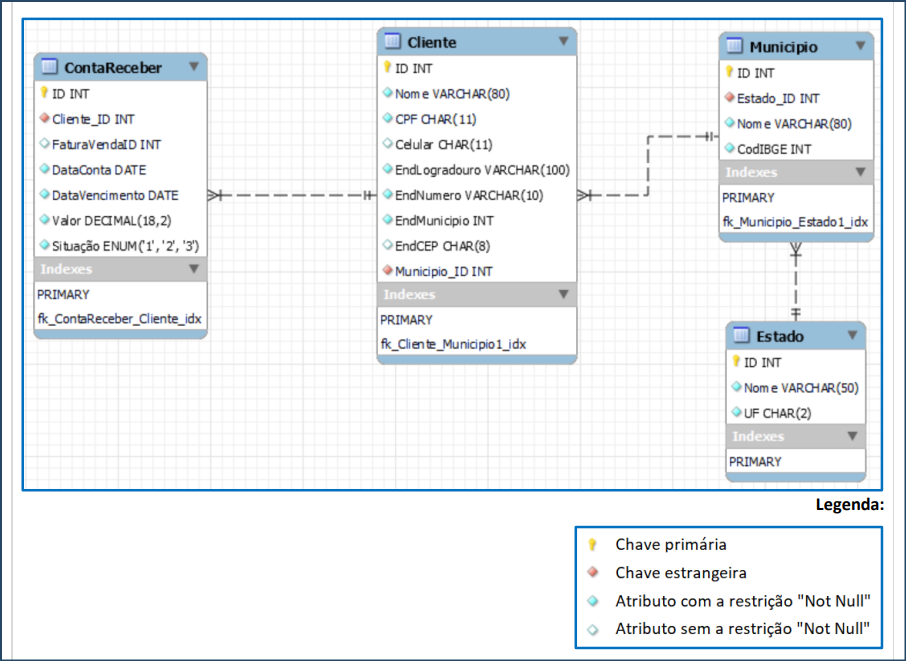

In [ ]:
CREATE DATABASE IF NOT EXISTS Loja;
USE Loja;

Tabela CLIENTE

In [ ]:
CREATE TABLE IF NOT EXISTS Cliente(
    ID INT AUTO_INCREMENT NOT NULL PRIMARY KEY,
    Nome VARCHAR(80) NOT NULL,
    CPF CHAR(11) NOT NULL,
    Celular CHAR(11) NULL,
    EndLogradouro VARCHAR(100) NOT NULL,
    EndNumero VARCHAR(10) NOT NULL,
    EndMunicipio INT NOT NULL,
    EndCEP CHAR(8) NULL,
    Municipio_ID INT NOT NULL,
    FOREIGN KEY (Municipio_ID) REFERENCES Municipio(ID)
);

ALTER TABLE cliente
DROP COLUMN EndMunicipio;

Município

In [ ]:
CREATE TABLE IF NOT EXISTS Municipio(
    ID INT AUTO_INCREMENT NOT NULL PRIMARY KEY,
    Estado_ID INT NOT NULL,
    Nome VARCHAR(80) NOT NULL,
    CodIBGE INT NOT NULL,
    FOREIGN KEY (Estado_ID) REFERENCES Estado(ID)
);

Estado

In [ ]:
CREATE TABLE IF NOT EXISTS Estado(
    Id INT AUTO_INCREMENT NOT NULL PRIMARY KEY,
    Nome VARCHAR(50) NOT NULL,
    UF CHAR(2) NOT NULL
);

ContaReceber

In [ ]:
CREATE TABLE IF NOT EXISTS ContaReceber(
    ID INT NOT NULL AUTO_INCREMENT PRIMARY KEY,
    Cliente_ID INT NOT NULL,
    FaturaVendaID INT NULL,
    DataConta DATE NOT NULL,
    DataVencimento DATE NOT NULL,
    Valor DECIMAL(18,2) NOT NULL,
    Situacao ENUM('1', '2', '3'),
    FOREIGN KEY(CLIeNTE_ID) REFERENCES CLIENTE(ID));

Inserir.sql

contento os comandos de manipulação (DML), com o objetivo de popular todas 
as tabelas existentes na base de dados (ou seja, inserir dados nas tabelas!). Insira ao menos três registros por tabela. 

In [ ]:
show tables in loja;
DESCRIBE cliente;
DESCRIBE contareceber;
DESCRIBE municipio;
DESCRIBE estado;

# ***Etapa 2***

Insert Estado

In [ ]:
INSERT INTO estado (Nome, UF)
VALUES
    ('Paraná', 'PR'),
    ('São Paulo', 'SP'),
    ('Rio Grande do Sul', 'RS');

Insert Minicipio

In [ ]:
INSERT INTO municipio (Estado_ID, Nome, CodIBGE)
VALUES
    (1, 'Curitiba', 4106902),
    (2, 'São Paulo', 3550308),
    (3, 'Porto Alegre', 4314902);

insert cliente

Analisando a tabela notei que a coluna "EndMunicipio' era redundante. assim removi a mesma

In [ ]:
ALTER TABLE cliente
CHANGE COLUMN EndMunicipio; 

In [ ]:
INSERT INTO cliente 
    (Nome, CPF, Celular, EndLogradouro, EndNumero, EndCEP, Municipio_ID)
VALUES 
    ('Dato Santos', 77777777777, '99999999999', 'Rua 1', '100', 88888888, 2),
    ('João Pedro', 88888888888, '55555555555', 'Rua 2', '200', 22222222, 1),
    ('Maria Clara', 99999999999, '77777777777', 'Rua 3', '300', 33333333, 3); 

SELECT * fROM cliente;


Insert ContaReceber

In [ ]:
INSERT INTO contareceber 
(Cliente_ID, FaturaVendaID, DataConta, DataVencimento, Valor, Situacao)
VALUES
(4, 1, 20240903, 20240904, 300.00, 'Conta paga'),
(5, 1, 20240903, 20241006, 150.00, 'Conta registrada'), 
(6, 1, 20240903, 20241101, 1000.00, 'Conta cancelada'); 

# ***Etapa 3***
Por meio dos comandos de consulta (DQL) da linguagem SQL, elabore um script chamado “consulta.sql” que irá 
conter uma visão (VIEW) que retornará todas as contas que ainda não foram pagas (Situação = 1), devendo conter as 
seguintes informações:
* ID da conta a receber
* Nome cLIENTE associado à conta
* CPF do Cliente associado à conta
* Data de vencimento da conta
* Valor da conta

In [ ]:
ALTER TABLE contareceber
CHANGE COLUMN Situacao Situacao ENUM('1','2','3');

COnsulta.sql

In [ ]:
CREATE VIEW v_contasPendente AS 
SELECT 
    contareceber.ID,
    cliente.Nome,
    cliente.cpf,
    contareceber.DataVencimento,
    contareceber.Valor
FROM cliente INNER JOIN contareceber
    ON cliente.ID = contareceber.Cliente_ID
WHERE contareceber.Situacao <> '3';

SELECT * FROM v_contaspendente;

# ***Resultados da aula prática:***
Elaborar um relatório que deverá conter introdução, métodos, resultados e conclusão sobre o assunto desenvolvido 
em aula prática, para compreender como foram desenvolvidas todas as etapas da atividade. Inserir no relatório todos 
os scripts utilizados na resolução desta atividade prática